In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('works.csv')


## 1. Узнать общее количество записей в датасете

In [15]:
max(data.count())

32683

## 2. Узнать количество мужчин и женщин в датасете

In [16]:
print('Кол-во мужчин:',len(data[data['gender'] == 'Мужской']))
print('Кол-во женщин:',len(data[data['gender'] == 'Женский']))

Кол-во мужчин: 13386
Кол-во женщин: 17910


## 3. Узнать сколько значений в столбце skills не NAN

In [17]:
data['skills'].isna().sum()

23711

## 4. Получить все заполненные скиллы

In [18]:
data['skills'].dropna()

0        <p>Аналитическое&nbsp;мышление,&nbsp;<span cla...
5        Ответственная,пунктуальная,дисциплинированная ...
10                         <p>Коммуникабельность&nbsp;</p>
13                         <p>Ответственность в работе</p>
21       <p>Усидчивость, умение удерживать в памяти нуж...
                               ...                        
32665    <p>Отвественность</p><p>Исполнительность</p><p...
32668    <p>Высокая работоспособность, нацеленность на ...
32672                                <p>исполнительный</p>
32674    <p>Нацелен на результат. Считаю себя командным...
32675                                 <p>трудоспособен</p>
Name: skills, Length: 8972, dtype: object

## 5. Вывести зарплату только у тех, у которых в скиллах есть Python (Питон)

In [19]:
pySalary = data['skills'].str.lower().str.contains('python|питон')
a1 = data['skills'].notna()
a2 = pySalary & a1
data[a2]['salary']

230      35000
334      20000
2394     35000
8096     15000
9014     25000
9667     90000
20930    30000
22530    50000
28286    23000
30430    23000
Name: salary, dtype: int64

## 6. Построить перцентили по заработной плате у мужчин и женщин

In [20]:
data.groupby('gender')['salary'].quantile([.1, .2, .3, .4, .5, .6, .7, .8, .9, 1])

gender      
Женский  0.1      15000.0
         0.2      18000.0
         0.3      20000.0
         0.4      22000.0
         0.5      25000.0
         0.6      30000.0
         0.7      30000.0
         0.8      35000.0
         0.9      47000.0
         1.0     900000.0
Мужской  0.1      15000.0
         0.2      20000.0
         0.3      25000.0
         0.4      30000.0
         0.5      30000.0
         0.6      35000.0
         0.7      40000.0
         0.8      50000.0
         0.9      60000.0
         1.0    1000000.0
Name: salary, dtype: float64

## 7. Построить графики распределения по заработной плате мужчин и женщин в зависимости от высшего образования

<AxesSubplot:xlabel='gender,educationType'>

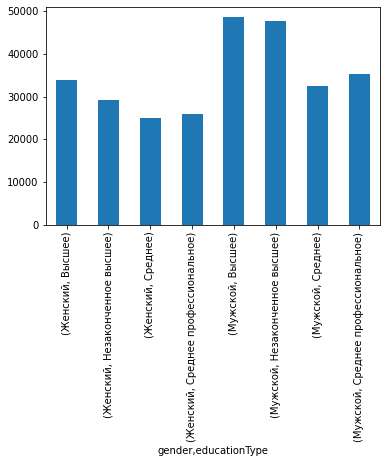

In [21]:
dataToPlot = data.groupby(['gender', 'educationType'])['salary'].mean()
dataToPlot.plot.bar()

## 8. Очистить и визуализировать данные по профессии инженер и должности менеджер

<AxesSubplot:xlabel='jobTitle,qualification'>

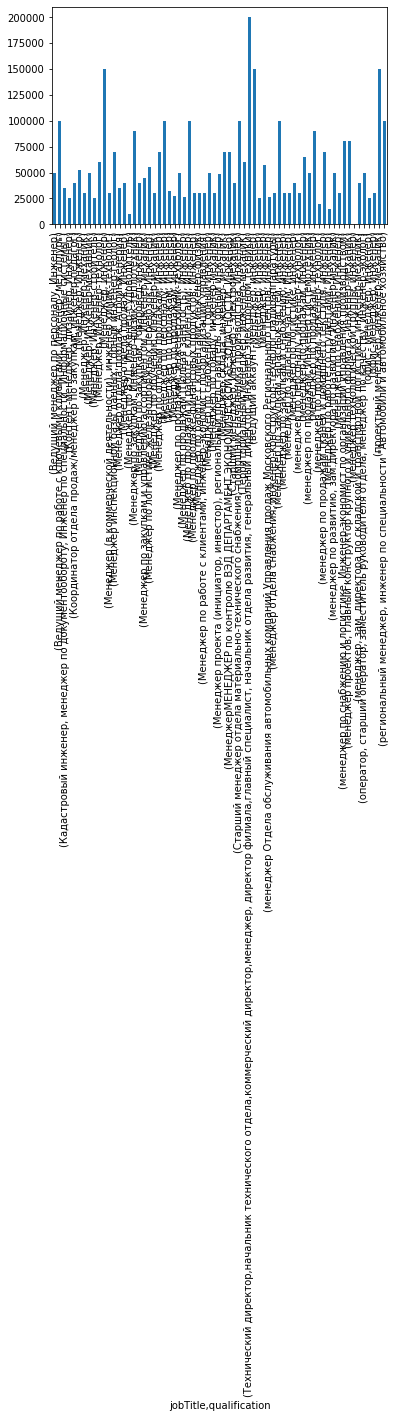

In [22]:
data.dropna(subset=['jobTitle'], inplace=True)
data.dropna(subset=['qualification'], inplace=True)

managerEngineer = data[data['jobTitle'].str.lower().str.contains('менеджер')&data['qualification'].str.lower().str.contains('инженер')]
b1 = managerEngineer.groupby(['jobTitle', 'qualification'])['salary'].mean()

b1.plot.bar()


# Задачи из readme

In [23]:
# Попытался как-то сгруппировать, но какое-то гов

data['qualification'] =  data['qualification'].str.lower()

def categorize(find, change, col):
    data[col].loc[data[col].str.contains(find) == True] = change

categories = {
    'экономист': 'эконом|финансис',
    'менеджер':'менедж',
    'юрист':'юри',
    'инженер':'инж',
    'учитель':'учитель',
    'доктор':'медиц|врач|фельдш',
    'техник':'техник'
}

for k,v in categories.items():
    categorize(v,k, 'qualification')


## У какого количества людей профессия и должность не совпадают?

In [24]:
data['qualification'] = data['qualification'].str.replace('-', ' ').str.lower()
data["jobTitle"] = data["jobTitle"].str.replace('-', ' ').str.lower()

(data['jobTitle'] == data['qualification']).value_counts(dropna=True)

# С моей категоризацией стало еще хуже

False    9891
True      239
dtype: int64

## Люди с каким образованием становятся менеджерами (топ-5)?

In [25]:
managers = data.loc[data['jobTitle'].str.lower().str.contains('менеджер') == True]
managers['qualification'].str.lower().dropna().value_counts().head(5)


экономист    142
менеджер     107
бакалавр      96
инженер       72
юрист         45
Name: qualification, dtype: int64

## Кем работают люди, которые по диплому являются инженерами (топ-5)?

In [26]:
engineers = data.loc[data['qualification'].str.lower().str.contains('инженер') == True]
engineers['jobTitle'].str.lower().dropna().value_counts().head(5)

инженер            25
главный инженер    22
директор           20
менеджер           13
водитель           11
Name: jobTitle, dtype: int64